In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [29]:
## Dataset link https://archive.ics.uci.edu/ml/datasets/wine

wine_df = pd.read_csv("./Downloads/wine.data" , names= ["Cultivator","Alcohal","Malic_Acid","Ash","Alcalinity_of_ash","Magnesium","Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","OD280/OD315","Proline"])

In [30]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohal,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [31]:
wine_df.shape

(178, 14)

In [32]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alcohal               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [33]:
wine_df.head(5)

,Cultivator,Alcohal,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


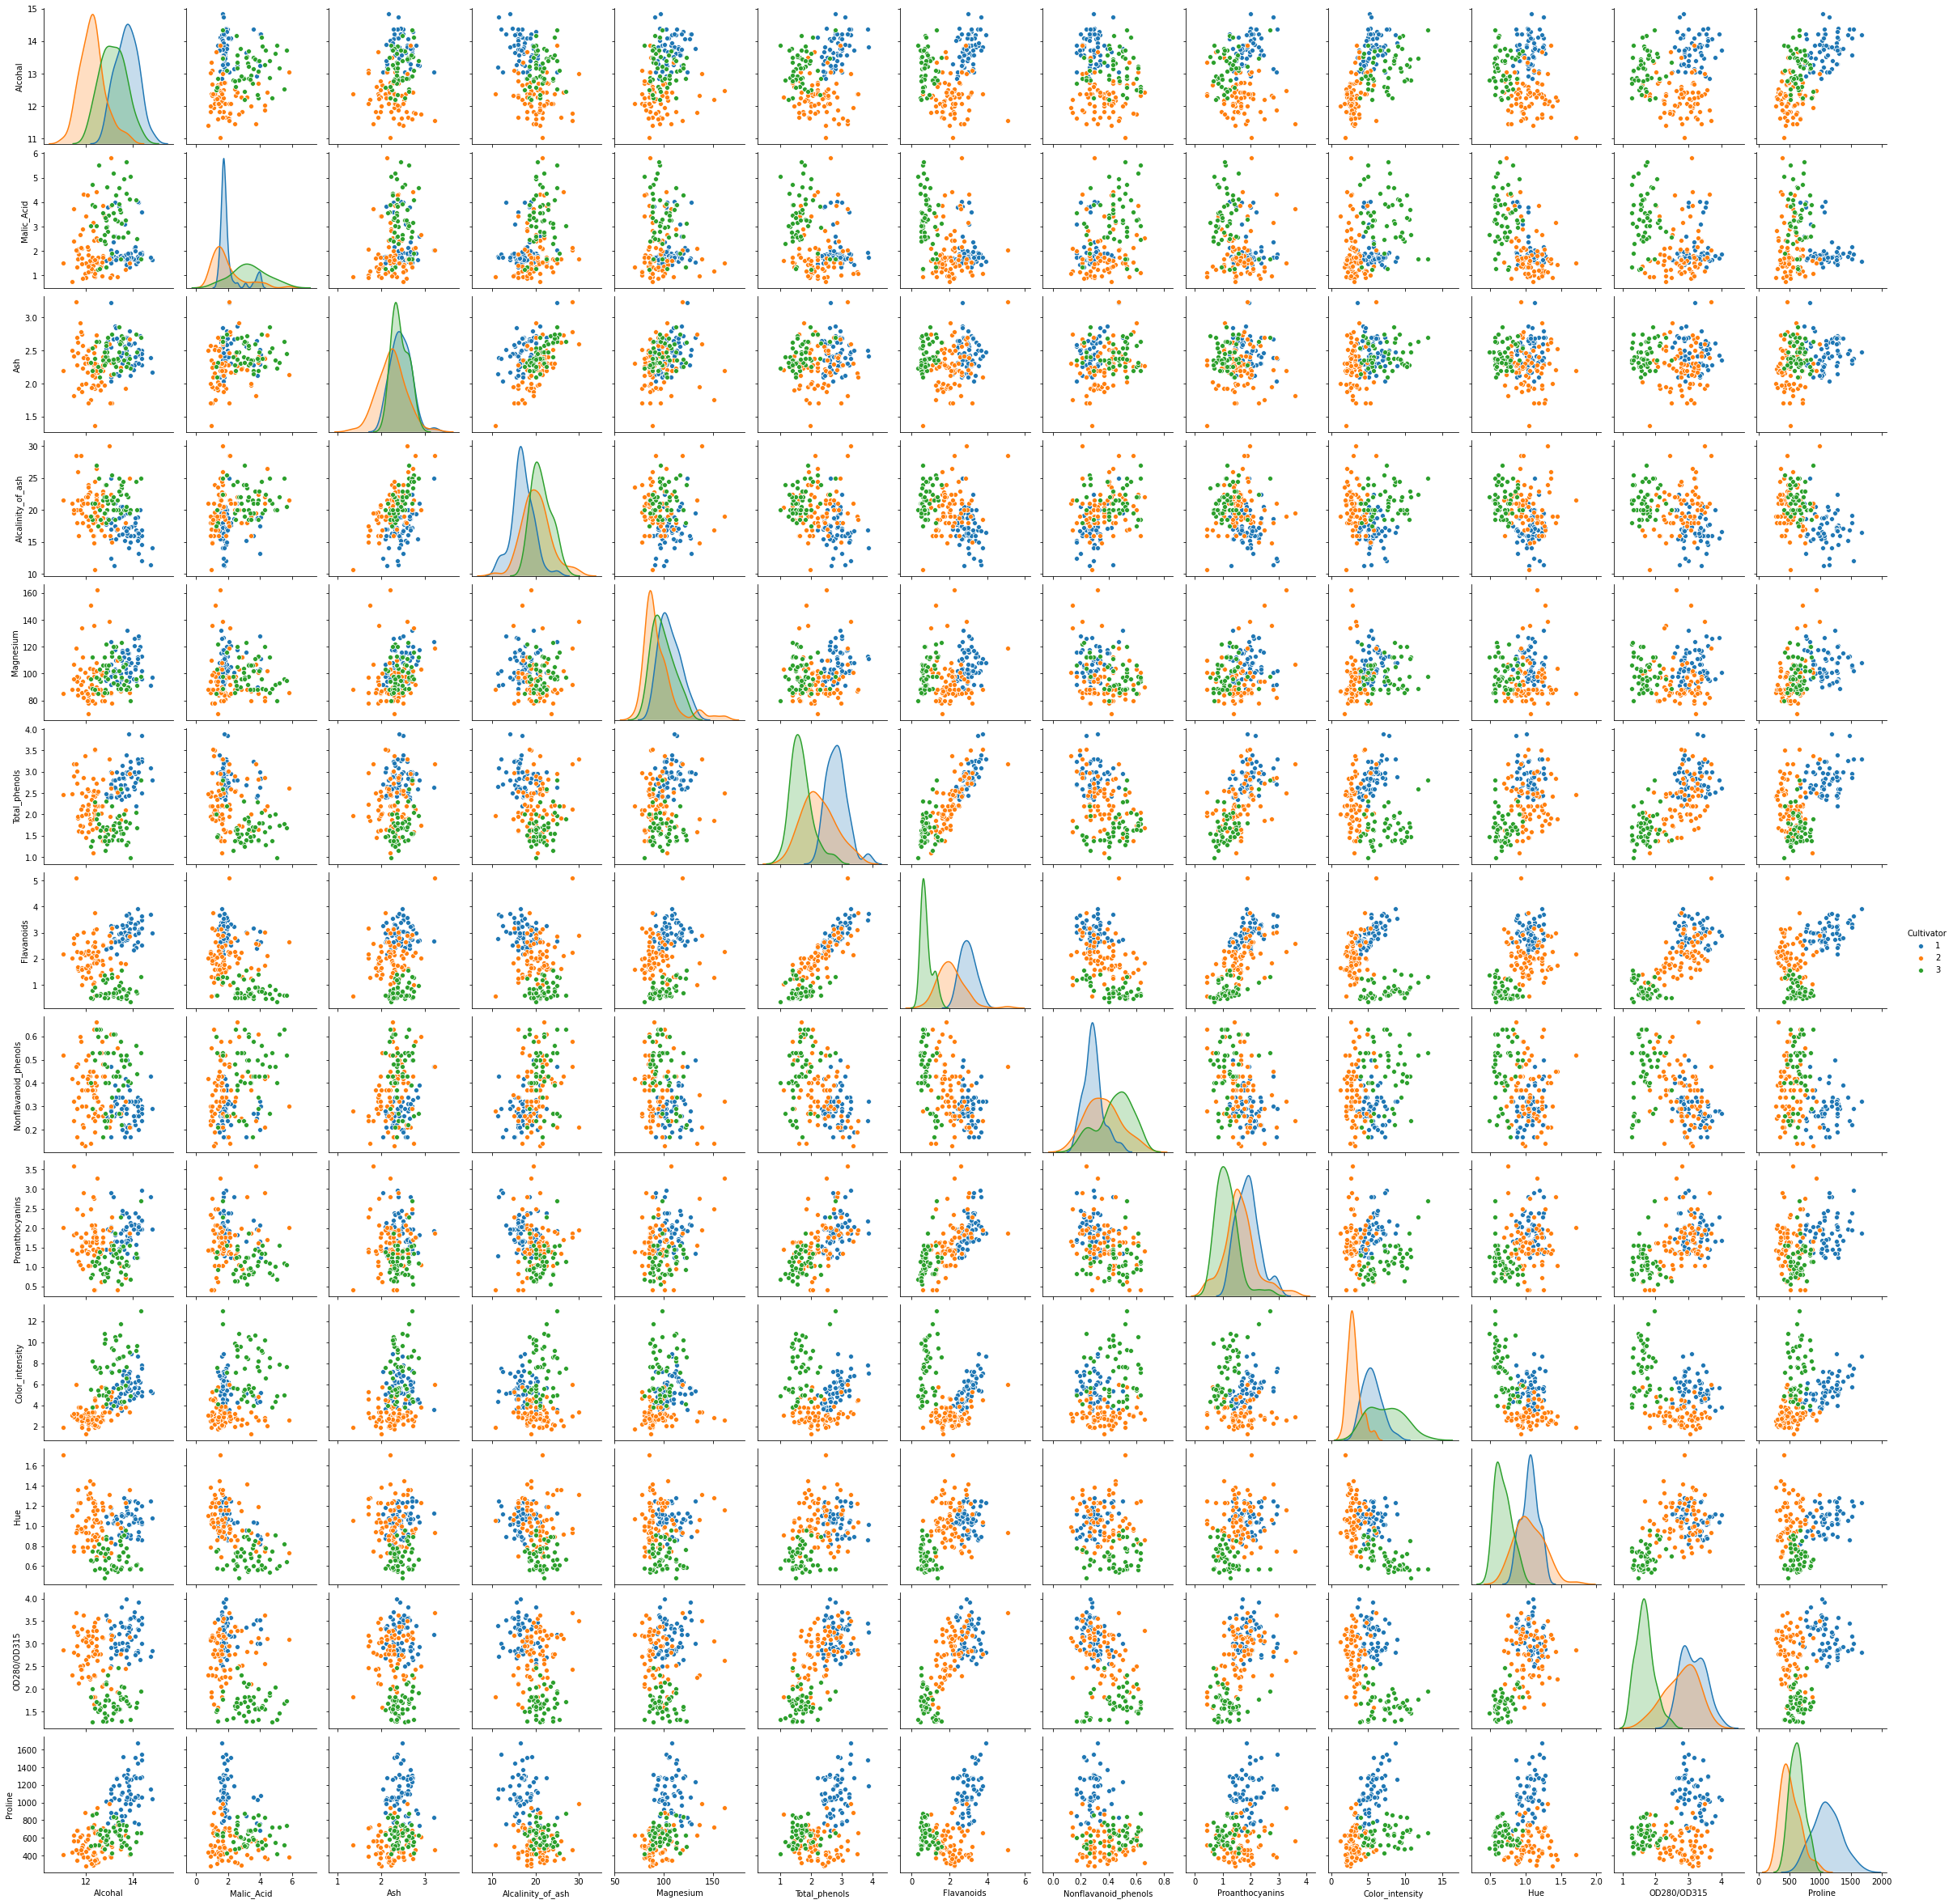

In [34]:
import seaborn as sns
sns.pairplot(wine_df , diag_kind= 'kde',hue="Cultivator")

#####
as there are 3 type of wines , there are 3 different classes.

Key point is , even if Most of the distributions should overlapping but central values should seperated apart and that will help us to differentiate seperate class . Even if few central values are overlaping but we have other attributes for which central values are seperated and that will help us in classification and overlapping will not have much imapct. 

so one dimension will compensate for other dim and these weak predictors over all will become strong predictors

In [35]:
from sklearn.model_selection import train_test_split

x = wine_df.drop("Cultivator",axis = 1)
y = wine_df["Cultivator"]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 1)

In [37]:
### Going by Gaussian Naive Baye's
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [41]:
model.score(x_train,y_train)

0.9758064516129032

In [42]:
model.score(x_test,y_test)

0.9814814814814815

In [39]:
test_pred= model.predict(x_test)
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [40]:
print(metrics.confusion_matrix(y_test,test_pred))

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


Class level Recall is : Accuracy at class Level , Almost 100%

Confusion Matrix 

Class 1 : Total record 23 , classified all correctly
Class 2 : Total Record 19 , classified 18 correctly
class 3 : Total record 12 , classified all correctly
    

### K-Fold Cross Validtion --> used only when number of data point is less

#### Take average of Scores to get overall average

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,x_train,y_train,cv =10)
print("Coss-validated scores: " , scores)
print("Avg scores: " , np.average(scores))

Coss-validated scores:  [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667]
Avg scores:  0.9673076923076922
